# Part 18 of Recipes: Circular Stacked Bar Plots

This page is primarily based on the following page at the Circos documentation site:



- [18. Circular Stacked Bar Plots](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 17 by clicking [here &#8592;](Recipes_Part17.ipynb).



----



8 --- Recipes
=============

18. Circular Stacked Bar Plots
------------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/circular_stacked_barplots/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/circular_stacked_barplots/images){.normal}
[Configuration](/documentation/tutorials/recipes/circular_stacked_barplots/configuration){.normal}
:::

This tutorial shows how to use Circos to create a general information
graphic, not related to genome visualization. Or at least, not obviously
related.

The image is a series of concentric stacked bar plots. Each ring
corresponds to several data points, which have been normalized so that
their sum is constant (e.g. 1000). We\'ll hide the scale and ideograms,
so only the data appear.

Another example of the use is Circos for illustration is described in
the [Nature Cover
tutorial](/documentation/tutorials/recipes/nature_cover_encode), which
shows you how to recreate the [Encode Nature
cover](http://www.nature.com/nature/journal/v489/n7414/index.html).

### creating the axis

The axis is a single \"ideogram\" of length 1000. We\'ll normalize all
the data sets to add up to 1000. The axis name is `gh`.

```ini
# scale.txt
chr - gh gh 0 1000 black
```


The karyotype is set to this file

```ini
# circos.conf
...
karyotype                   = scale.txt
chromosomes_units           = 1
chromosomes_display_default = yes
...
```


### creating the data

The data were created by a short script which generated 27 random data
sets. Each data set had between 4 and 10 data points and for each data
set the values were cumulative.

The data files are named `species.0.txt` \... `species.26.txt`.

```ini
# species.0.txt
gh 0 401 id=gh6
gh 401 468 id=gh8
gh 468 674 id=gh9
gh 674 1000 id=gh10
```


```ini
...
```


```ini
# species.26.txt
gh 0 235 id=gh3
gh 235 454 id=gh4
gh 454 534 id=gh7
gh 534 710 id=gh8
gh 710 757 id=gh9
gh 757 1000 id=gh10
```


Each data value has a unique id (`gh1` \... `gh10`) which is used to
assign a color.

This kind of data set corresponds to a situation where you have several
samples (e.g. species) each composed of one or more components from a
fixed set (`gh1` \... `gh10`). The components are displayed as
cumulative fractions and therefore each data set has the same maximum
value.

### automating track display

Let\'s display the first 7 data sets. We\'ll use [automated track
placement](/documentation/tutorials/recipes/automating_tracks) to do so,
so that the same configuration file can be used for each track.

```ini
# circos.conf
<plots>
<<include speciesplot.conf>>
<<include speciesplot.conf>>
<<include speciesplot.conf>>
<<include speciesplot.conf>>
<<include speciesplot.conf>>
<<include speciesplot.conf>>
<<include speciesplot.conf>>
</plots>
```


where

```ini
# speciesplot.conf
<plot>
type  = highlight
file  = species.counter(plot).txt
r0    = eval(sprintf("%fr",conf(track_start) - conf(track_step) * counter(plot) ))
r1    = eval(sprintf("%fr",conf(track_start) - conf(track_step) * counter(plot) + conf(track_width) ))
fill_color       = black
stroke_thickness = 10p
stroke_color     = white
#stroke_color     = black
<<include ghcolorrule.conf>>
</plot>
```


You can futher simplify this configuration by moving the common constant
parameters (e.g. fill\_color) to the outer [\<plots\>]{.syn-block}
block. Any parameters in this block will be inherited by each of the
[\<plot\>]{.syn-block} blocks.

### coloring data values

Data values are colored based on rules, which use the value of the `id`
parameter. The rules are imported into each track block from
`ghcolorrule.conf` which contains a single rule

```ini
<rules>
<rule>
condition  = 1
# ghN -> spectral-10-div-N
fill_color = eval(sprintf("spectral-10-div-%d",substr(var(id),2)))
</rule>
</rules>
```


The condition is always true, so the rule applies to each point. The
number from the point\'s `id` field (e.g. `gh7`) is extracted and then
used to define a color (e.g. `spectral-10-div-7`). The color palette
used is the 10-color diverging spectral [Brewer
Palette](/documentation/tutorials/configuration/configuration_files/).

### Track Placement

Tracks are placed automatically, controlled by three `track_*`
parameters

```ini
# if using 7 data sets
# well spaced
#track_width = 0.08
#track_step  = 0.1
#track_start = 0.9
```


```ini
# abutting
track_width = 0.1
track_step  = 0.1
track_start = 0.9
```


```ini
# if using 3x7 data sets
#track_width = 0.03
#track_step  = 0.04
#track_start = 0.95
```


To add more tracks, add more

```ini
<<include speciesplot.conf>>
```


lines to the [\<plot\>]{.syn-block} block in `circos.conf`.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/18/

/home/jovyan/circos-tutorials-0.67/tutorials/8/18


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.40s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/18
debuggroup summary 0.40s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.40s loading configuration from file circos.conf
debuggroup summary 0.41s found conf file circos.conf
debuggroup summary 0.60s debug will appear for these features: output,summary
debuggroup summary 0.60s bitmap output image ./circos.png
debuggroup summary 0.60s SVG output image ./circos.svg
debuggroup summary 0.60s parsing karyotype and organizing ideograms
debuggroup summary 0.60s karyotype has 1 chromosomes of total size 1,001
debuggroup summary 0.61s applying global and local scaling
debuggroup summary 0.61s allocating image, colors and brushes
debuggroup summary 2.92s drawing 1 ideograms of total size 1,001
debuggroup summary 2.92s drawing highlights and ideograms
debuggroup summary 2.92s found c

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized val

View the plot in this page using the following cell.

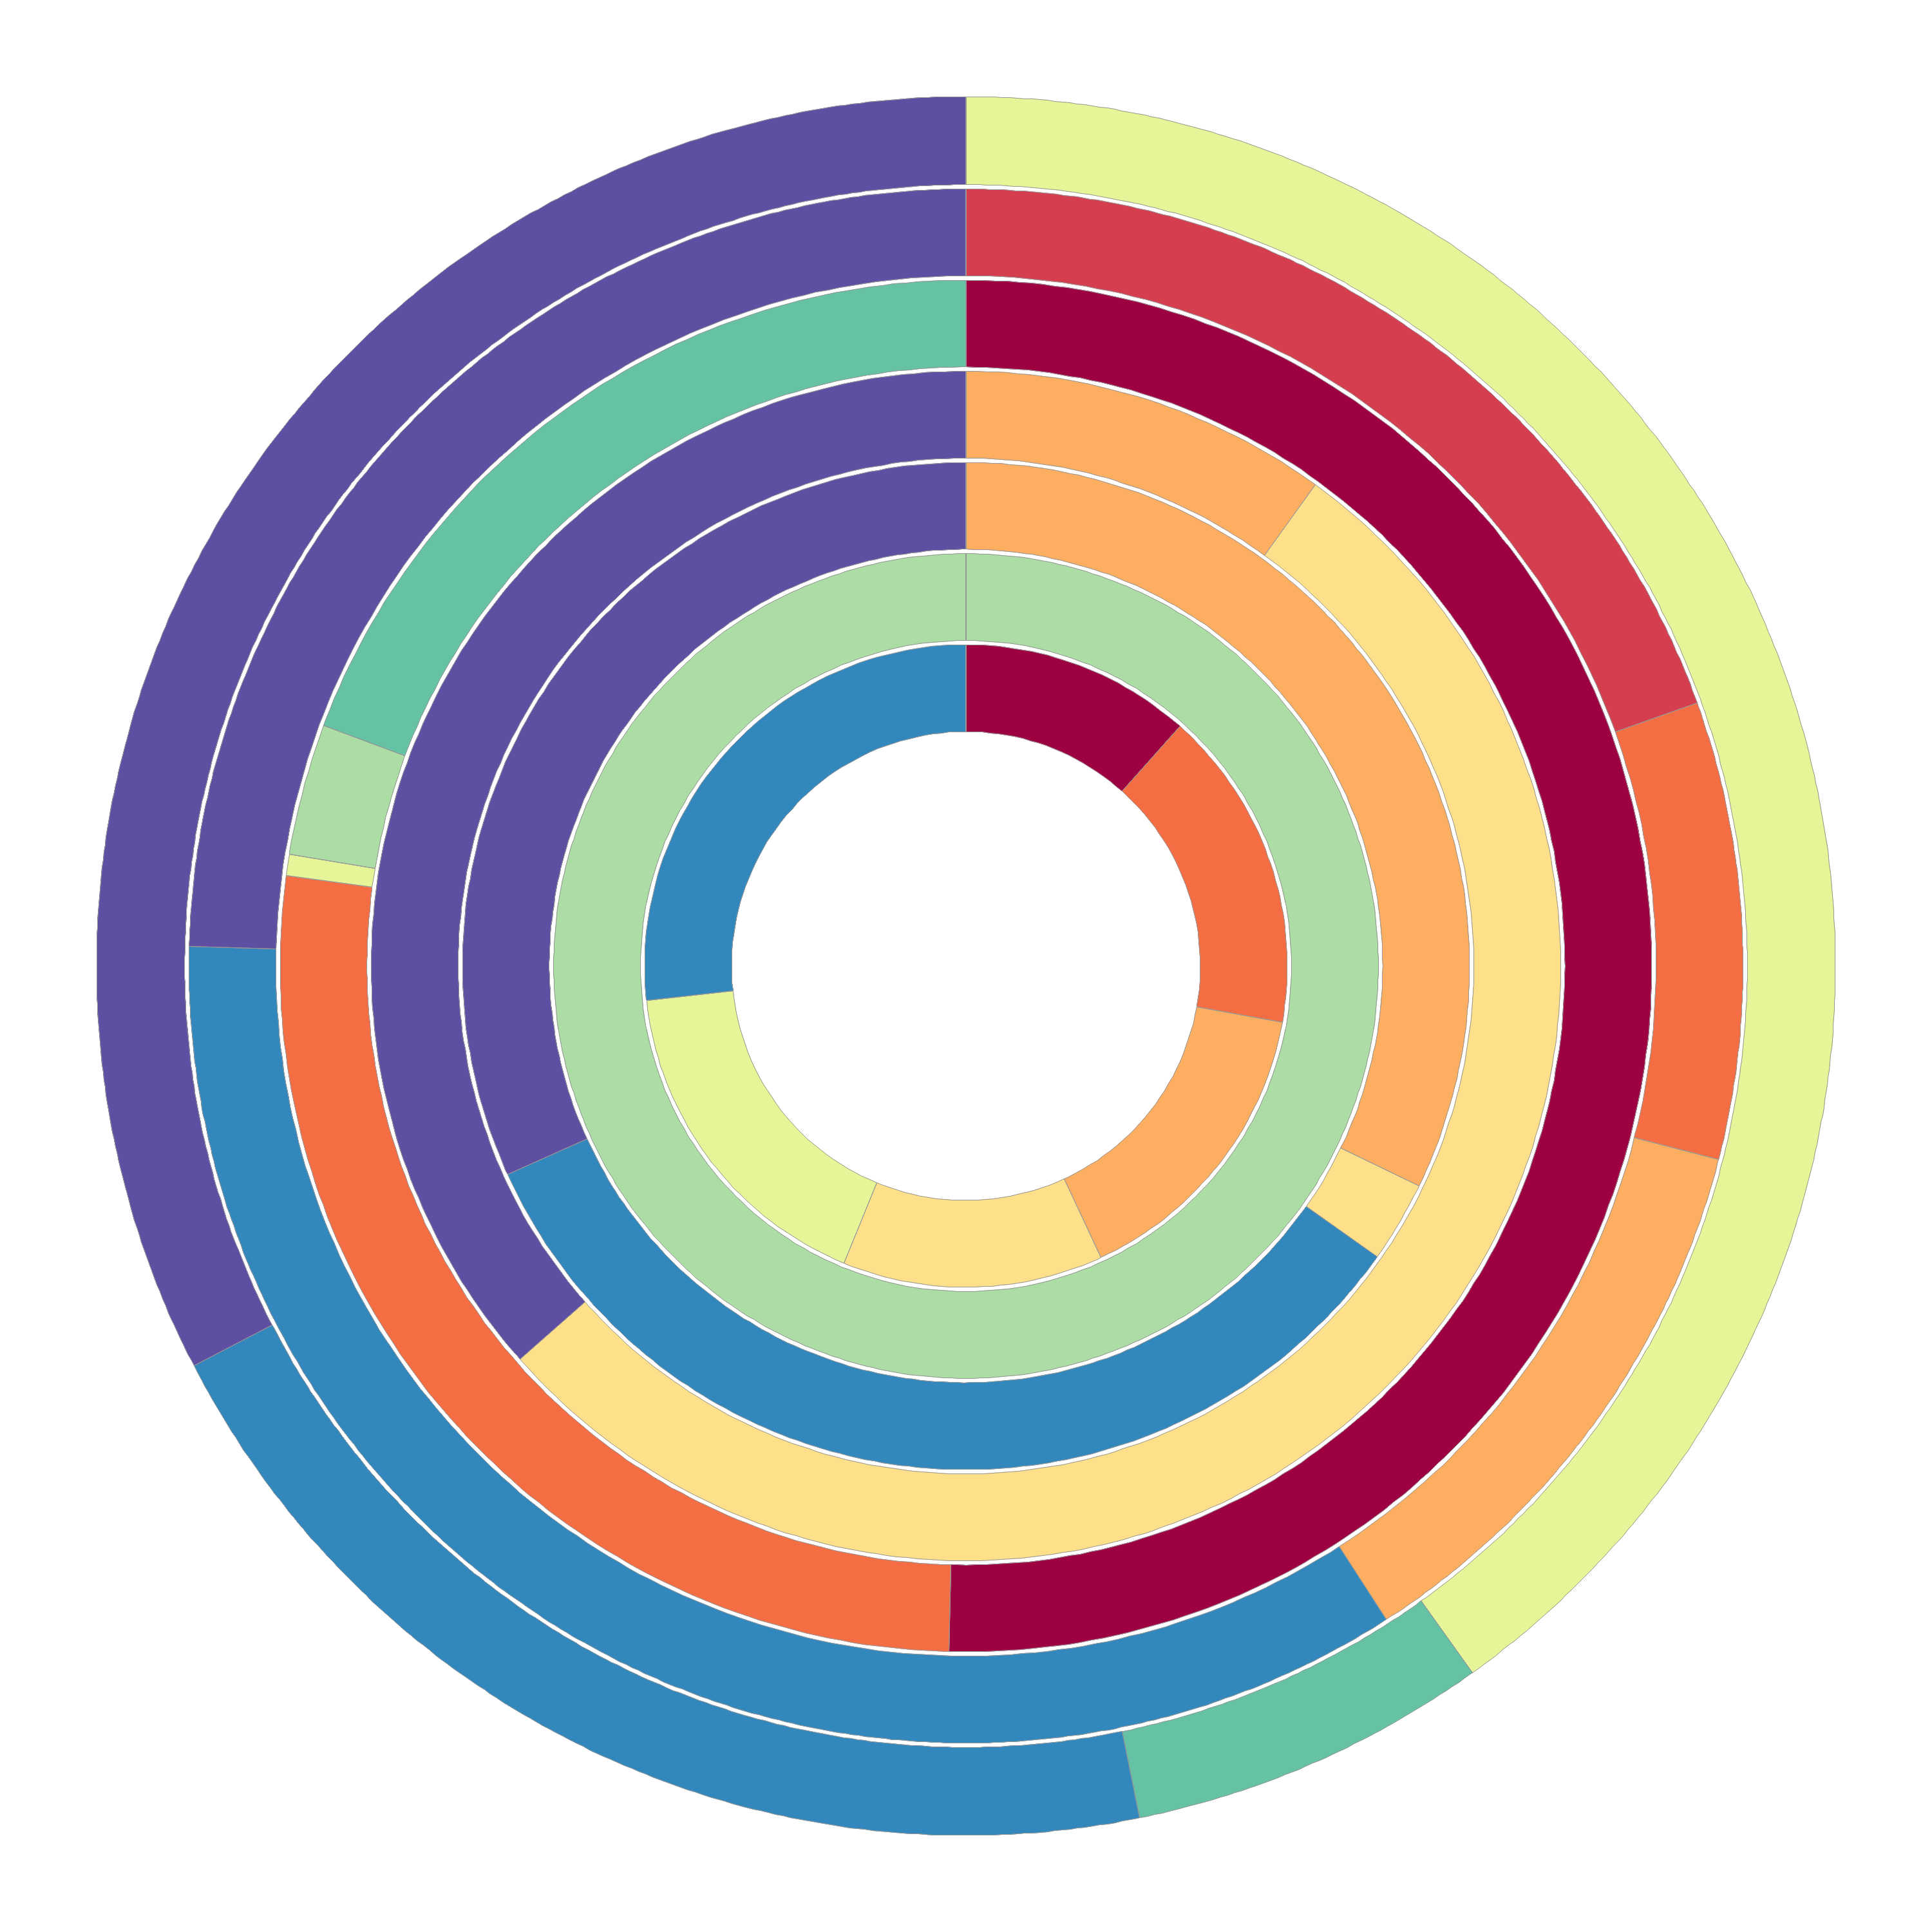

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part19.ipynb).

----